In [76]:
import os
import sys
sys.path.append('c:/Users/Saroj Chand/Documents/GitHub/nv-center-network-analysis')
from src.utils import extract_nv_data, calculate_distances

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from src.utils import extract_nv_data, calculate_distances
from scripts.data_preprocessing import preprocess_data, save_processed_data
from scripts.network_analysis import compute_correlation_matrix, build_network, plot_network

In [77]:

# Load data from JSON file
file_path = '../data/raw/2024_05_01-10_21_43-johnson-nv0_2024_03_12.txt'
with open(file_path, 'r') as file:
    data = json.load(file)
# Print the keys in the JSON data
print(data.keys())

dict_keys(['nv_list', 'num_steps', 'num_reps', 'num_runs', 'uwave_ind', 'uwave_freq', 'num_exps_per_rep', 'load_iq', 'step_ind_master_list', 'counts-units', 'counts', 'states', 'timestamp', 'opx_config'])


In [78]:
# Number of NVs
num_nvs = len(data['nv_list'])

# Extract reference and signal counts
reference_counts = data['counts'][0]
signal_counts = data['counts'][1]

# Average counts over repetitions and runs
averaged_reference_counts = np.mean(reference_counts, axis=(0, 1))
averaged_signal_counts = np.mean(signal_counts, axis=(0, 1))

# # Convert nested lists to flat lists
# flat_reference_counts = [item for sublist in averaged_reference_counts for item in sublist]
# flat_signal_counts = [item for sublist in averaged_signal_counts for item in sublist]

# # Convert flat lists to DataFrames
# df_reference_counts = pd.DataFrame(flat_reference_counts, columns=['Reference_Counts'])
# df_signal_counts = pd.DataFrame(flat_signal_counts, columns=['Signal_Counts'])

# # Print a few rows to verify the conversion
# print(df_reference_counts.head())
# print(df_signal_counts.head())
print(averaged_reference_counts)

[[17.89280608 23.50267553 20.74217452 26.57650738 30.08672092 27.54675121
  22.83090968 27.90441886 22.76905116 26.05030914 22.56479804 21.70371635
  24.91909201 26.14806399 23.04482341 22.8124762  19.44542193 25.59071665
  19.7641317  24.60969122 24.30890923 25.64968893 27.61900155 20.17726937
  23.89459694 21.66801663 19.44074069 21.82323485 23.5014802  26.91652149
  26.80020853 19.23550757 19.72565768 26.86081446 25.89368981 25.51588205
  25.46947132 27.18146399 22.20966415 24.45181017 22.92841031 21.4354009
  24.55882552 26.12334142 25.73834972 24.90578037 23.70850391 30.54550923
  22.99742742 19.6538992  21.13448976 18.73709355 22.61427608 24.0313314
  28.77112238 20.44788409 21.00356518 23.14849962 29.37194537 28.67156023
  18.32955833 20.05714851 22.64895627 18.62461738 25.34327538 19.16998179
  18.1496888  23.46141032 14.63505436 20.07226143 19.35114909 22.20439915
  20.21900733 30.27732749 20.26531317 23.06834322 24.53490627 23.07685746
  21.03348818 22.40227338 21.6782255  24

In [79]:
# Threshold values
threshold_values = np.array([nv['threshold'] for nv in data['nv_list']])
# Apply thresholding to reference and signal counts
binary_reference_counts = np.where(averaged_reference_counts > threshold_values[:, None], 1, 0)
binary_signal_counts = np.where(averaged_signal_counts > threshold_values[:, None], 1, 0)
print(binary_reference_counts)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 1 1 1]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 1 1 1]]


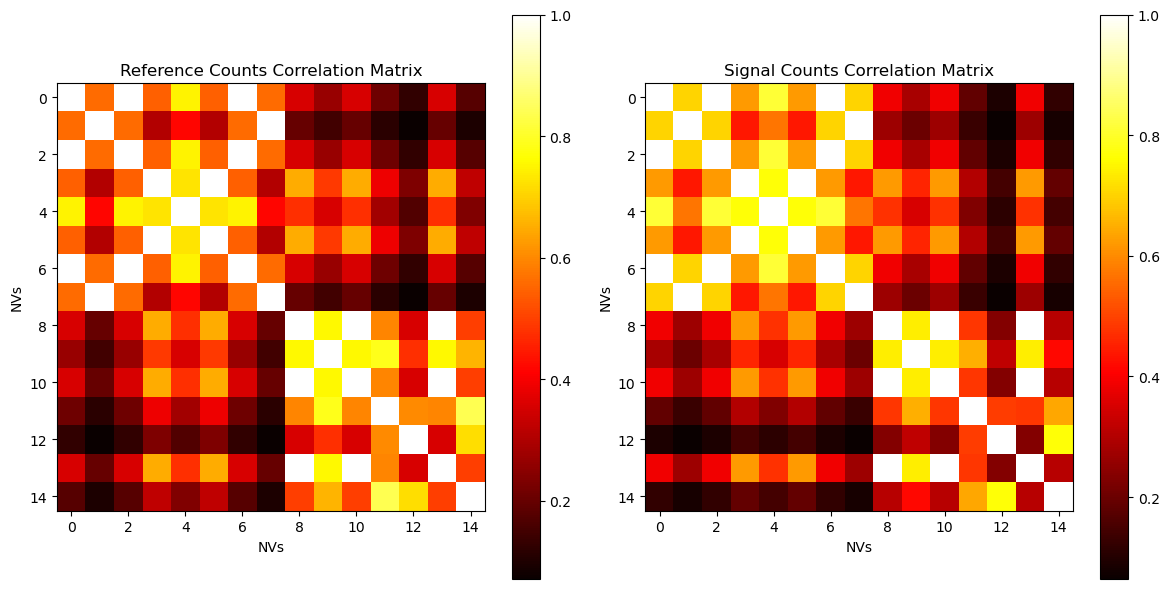

In [74]:
# Compute correlation matrices
correlation_matrix_reference = np.corrcoef(binary_reference_counts)
correlation_matrix_signal = np.corrcoef(binary_signal_counts)

# Plot resized correlation matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

cax0 = axs[0].imshow(correlation_matrix_reference, cmap='hot', interpolation='nearest')
axs[0].set_title('Reference Counts Correlation Matrix')
axs[0].set_xlabel('NVs')
axs[0].set_ylabel('NVs')
fig.colorbar(cax0, ax=axs[0])

cax1 = axs[1].imshow(correlation_matrix_signal, cmap='hot', interpolation='nearest')
axs[1].set_title('Signal Counts Correlation Matrix')
axs[1].set_xlabel('NVs')
axs[1].set_ylabel('NVs')
fig.colorbar(cax1, ax=axs[1])

plt.tight_layout()
plt.show()

In [75]:
# Define the output directory
output_dir = '../data/correlation_matrix'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save correlation matrices
np.save(os.path.join(output_dir, 'correlation_matrix_reference.npy'), correlation_matrix_reference)
np.save(os.path.join(output_dir, 'correlation_matrix_signal.npy'), correlation_matrix_signal)